In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
from scipy.special import wofz

In [2]:
def lorentzian(x, gamma):
    return (gamma/pi)/(x**2 + gamma**2)

def lorentzian_fit(f, f0, gamma, A, eps):
    return eps + A * lorentzian(f-f0, gamma)

def windowed_lorentzian(f,f0,tau,T,A,eps):
    numerator = (np.cosh(T/2/tau) - np.cos(2*pi*T*(f-f0)))*np.exp(-T/2/tau)
    return eps + A * numerator/(1 + 16*pi**2*tau**2*(f-f0)**2)

def voigt(x, sigma, gamma):
    z = (x + 1j*gamma)/sigma/2**0.5
    return np.real(wofz(z))/sigma/(2*pi)**0.5

def voigt_fit(f,f0,sigma, gamma, A, eps):
    return eps + A*voigt(f-f0, sigma, gamma)

In [6]:
MHz = 1e6
f0 = 278.2*MHz
f = np.linspace(f0-0.1*MHz, f0+0.1*MHz, 1000)
Q = 20000
tau = 2*Q/(2*pi*f0)
T = 8.192e-3
eps = 0.0
A = 1056
sigma = 2710
gamma = 514

In [9]:
y = lorentzian_fit(f, f0, gamma, A, eps)
y /= np.max(y)
z = windowed_lorentzian(f, f0, tau, T, A, eps)
z /= np.max(z)
w = voigt_fit(f, f0, sigma, gamma, A, eps)
w /= np.max(w)

When scaled, the windowed lorentzian really isn't that different from an actual Lorentzian. It isn't any broader which is what I need to explain the breadth of the PSDs generated during fast chirp.

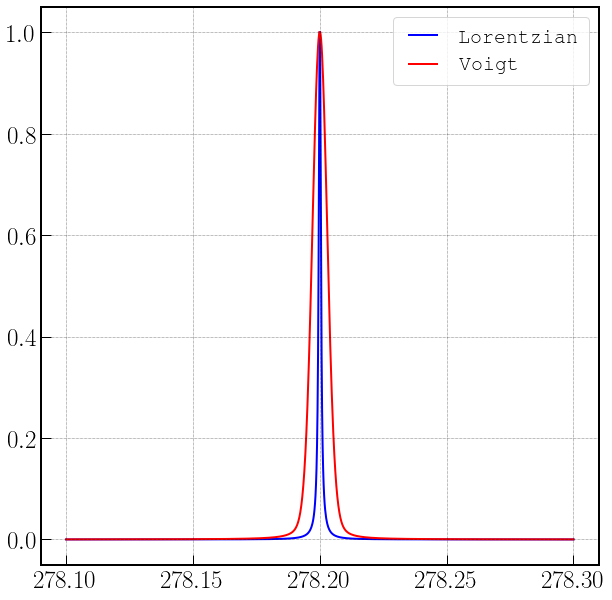

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f/MHz, y,'b', label='Lorentzian')
# ax.plot(f/MHz, z, 'r', label='Windowed Lorentzian')
ax.plot(f/MHz, w, 'r', label='Voigt')
ax.legend(loc='best')
ax.grid()
ax.axis('tight');

In [32]:
gamma

3750.0